"""
Objective: Make a model to predict the app rating, with other information about the app provided so the features are the other information, using 
the multiple features we are going to model the rating of the appliation.
we are going to predict which apps will have high ratings.
these are features:
App: Application name

Category: Category to which the app belongs 



Size: Size of the app

Installs: Number of user downloads/installs for the app

Type: Paid or Free

Price: Price of the app

Review: Number of user reviews for the app

Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

Genres: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres.

Last Updated: Date when the app was last updated on Play Store

Current Ver: Current version of the app available on Play Store

Android Ver: Minimum required Android version

My lable is:
Rating: Overall user rating of the app
since the reiews are. 4.2, 4.1,3.5, etc, so that makes our value continuous value not categorical.
""""        

"""
Steps to perform:

Load the data file using pandas. 

Check for null values in the data. Get the number of null values for each column.

Drop records with nulls in any of the columns. 

Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

Extract the numeric value from the column

Multiply the value by 1,000, if size is mentioned in Mb

Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

Installs field is currently stored as string and has values like 1,000,000+. 

Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer

Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

5. Sanity checks: #numbering is wrong but we are following the question with the same wrong number.

Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

For free apps (type = “Free”), the price should not be >0. Drop any such rows.

5. Performing univariate analysis: 

Boxplot for Price

Are there any outliers? Think about the price of usual apps on Play Store.

Boxplot for Reviews

Are there any apps with very high number of reviews? Do the values seem right?

Histogram for Rating

How are the ratings distributed? Is it more toward higher ratings?

Histogram for Size

Note down your observations for the plots made above. Which of these seem to have outliers?

 

6. Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price

Is 200 indeed a high price?

Drop these as most seem to be junk apps

Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?

Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?

Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

Make boxplot for Ratings vs. Category

Which genre has the best ratings?

For each of the plots above, note down your observation.

8. Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

10. Separate the dataframes into X_train, y_train, X_test, and y_test.

11 . Model building

Use linear regression as the technique

Report the R2 on the train set

12. Make predictions on test set and report R2.
"""

step 1

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


#### 1. Load the data file using pandas. 

In [56]:
inp0 = pd.read_csv("googleplaystore.csv")

In [57]:
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [58]:
# info of the data. most of data types/ our features are categorical data / object
# before you implement your linear regression.
#When we have linear model our data should be numerical, if they are not numerical we can not implemetn linear regression.
# rating which is lable is numerical/ float.
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### 2. Check for null values in the data. Get the number of null values for each column by use of isnull().sum

In [59]:
inp0.isnull().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### 3. Drop records with nulls in any of the columns. 
    - this is done because ratings is our target variable

In [60]:
inp0.shape

(10841, 13)

In [61]:
# why we are droping rating null although it is a large number of null? bcs number of data is more than 10,000. so droping 
#1000 values is okay. 
# target should not have any missing values. so we simply drop them.
#function for droping values in pandas is .dropna function. it drops all your rows with missing data.
# .how = any is optional.
# inplace = True change update in dataframe.
inp0.dropna(how ='any', inplace = True)

In [62]:
# recheck your data to see if any missing is available
inp0.isnull().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Confirming that the null records have been dropped

#### 
Teacher does this question form number 4 to number 1.

4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them: to convert it into correct data type

1-Size column has sizes in Kb as well as Mb. 
Extract the numeric value from the column
Multiply the value by 1,000, if size is mentioned in Mb

To analyze, you’ll need to convert these to numeric.
first we need to conver size dta to numerical
and we need to confrom everything to oneform. 
if your data type is MB we need to multiply it by 1000 so that it can converted to KB.

2- Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

3- Installs field is currently stored as string and has values like 1,000,000+. 

Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer

4-Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

Change variable to correct types:
We start from number 4 , fixing price column

In [63]:
# first we access to our data type"
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [64]:
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [65]:
# based on the codes run above about data type, price is object and string data. bcs of the $ sign. We need to convert it
# to numerical data.
# here my price data have no $ sign because I have run coded related to removing $ sign.
inp0.Price.value_counts()[:10]

0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
$3.99      58
$1.49      30
$2.49      21
$5.99      18
$9.99      16
Name: Price, dtype: int64

Price column needs to be cleaned

4.	Price field is string and has $ symbol. Remove ‘$’ sign, and convert to numeric

Some have dollars, some have 0
- we need to conditionally handle this
- first, let's modify the column to take 0 if value is 0, else take the first letter onwards

In [66]:
# there are other stretgies like replace $ by nothing or lamda opeartor.
#if x=='0' if price is 0 no problem,  else float(x[1:] if your value is anything excep 0 then get your number, starting value is 1
# at the same time your value will be passed to float, so $ sign will be removwd. in 2.99 instead of $2.99

# this code gives me error because I have already run this.
inp0['Price'] = inp0.Price.map(lambda x: 0 if x=='0' else float(x[1:]))

In [67]:
# we check our data to see if sign is removed.
inp0.Price.value_counts()[:10]

0.00      8715
2.99       114
0.99       106
4.99        70
1.99        59
3.99        58
1.49        30
2.49        21
5.99        18
9.99        16
6.99        13
399.99      11
14.99       10
4.49         9
3.49         7
7.99         7
29.99        6
24.99        5
11.99        5
12.99        5
19.99        5
8.99         4
5.49         3
16.99        3
10.00        3
Name: Price, dtype: int64

The other columns with numeric data are - 
1. Reviews
2. Installs
3. Size

2.	Reviews is numeric field that is loaded as a string field, convert it to numeric (int/float)
It is already numerical wondering why it is asking this question

In [68]:
# here is the funcion to convrt it to numerical.
inp0.Reviews = inp0.Reviews.astype("int32")

In [69]:
inp0.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9360, dtype: int32

In [70]:
# get description 
inp0.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

Now, handling the installs column

3 - Installs field is currently stored as string and has values like 1,000,000+. 

 - Treat 1,000,000+ as 1,000,000

- remove ‘+’, ‘,’ from the field, convert it to integer


In [71]:
# let's look into install part
inp0.Installs.value_counts()


1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [83]:
# "return int " in the libe below return me integer:'
# val is data frame, Replace replace our unwanted data.
# .replace("+","") replaces + with nothing
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))



In [73]:
inp0.Installs = inp0.Installs.map(clean_installs)

In [84]:
inp0.Installs 

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: int64

In [74]:
# using replace we removed , and plus.
inp0.Installs.describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

#### Handling the app size field
    1. Size column has sizes in KB as well MB. To need to be able to analyze, we’ll need to convert these to numeric
        a. Extract the numeric value from the column
   


In [75]:
# [ we use inp0 o check only one column"]
inp0['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

"""
b.	Multiply the value by 1,000 if size is mentioned in MB
We are going to replace M with K.
if 'M' in size
- we are checiking if m is in the size, data is string data then in part will work:if 'M' in size:


if 'M' in size:
 x = size[:-1]
 
- M in the end , yes, so we will take everything apart from last value. 

x = float(x)*100
- if size is M multiply it in 1000.

elif 'k' == size[-1:]:
x = size[:-1] 
- if k is found, we will take everything from the last element. 
 
 
 float is type pasting
"""


In [77]:
def change_size(size):
# if seize contain letter M, it mean size is in MB,  we are converting them into KB by multiplying it to 1000. this way we have all our sizes 
#in KB. so purpose is having uniforamlity.

# using in in the first line that is :    if 'M' in size:: if you look at the data in the ell above, there is M at the end of all numbers, so it is string for string data we can use 
# in.  we are scanning the string data. 
    if 'M' in size:
# -1 mean M will be not considered. / -1, removes M from size.  x = size[:-1] means M will be present your type casting will not work.
        x = size[:-1]
#if size is in M multiply it by 1000
        x = float(x)*1000
        return(x)
# if K, we take everything from last element refered to by [-1:]
    elif 'k' == size[-1:]:
        x = size[:-1]   
#if it is x it is going pass the float and we are not multiplying any values, s
        x = float(x)
        return(x)
    else:
        return None

In [78]:
#updating our data. 
#same size and map will be used. we will appyly change_size function on our size column "inp0["Size"]" 
# after applying this your dara should be clean.
inp0["Size"] = inp0["Size"].map(change_size)



In [80]:
inp0.Size

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, Length: 9360, dtype: float64

In [26]:
# here it shows that size is numerical.
inp0.Size.describe()

count      7723.000000
mean      22970.456105
std       23449.628935
min           8.500000
25%        5300.000000
50%       14000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [81]:
#filling Size which had NA
inp0.Size.fillna(method = 'ffill', inplace = True)


In [82]:
inp0.Size

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839     3600.0
10840    19000.0
Name: Size, Length: 9360, dtype: float64

In [28]:
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### 5. Some sanity checks

In [29]:
# question from calssmate:
#Whatever the output is there take screenshot of the output 3:59:45 because you need to submit everythings.

1.	Avg. rating should be between 1 and 5, as only these values are allowed on the play store. Drop any rows that have a value outside this range.

In [30]:
# since it is asking us about the average; min and max, we get the description of rating column.
# if our data were higher than 5 lke 5.1 or more, we needed to drop them, those will be considered as outier data.
inp0.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Min is 1 and max is 5. Looks good.

2.	Reviews should not be more than installs as only those who installed can review the app.

Checking if reviews are more than installs. Counting total rows like this.
Reviews should not be more than istalls. if for any values this condition is true, we will drop those data,

In [31]:
# this is your condition code: let's see how many of your reviews are greater than install.
# there are 7 data that are greater than install
len(inp0[inp0.Reviews > inp0.Installs])

7

In [32]:
# here we are checking them without len in the table:
inp0[inp0.Reviews > inp0.Installs]
# in the table below it is showing all  numbers / values under Reviews that are greated than Installs. and now we have to drop them.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [33]:
# very simple, to drop those data we  just reverse the code; these are our valid data.
#.copy() by this function we copy our data and save it in the same data frame of inp0
inp0 = inp0[inp0.Reviews <= inp0.Installs].copy()
# now we will lose all the seven entries.



In [34]:
# conform it with the help of shape:
inp0.shape

(9353, 13)

In [35]:
# now we have those installs that are greated than reviews and as shown in the cell 27, cell above and 
#under, the table belew number of those columns are 9353 rows × 13 columns

inp0[inp0.Reviews <= inp0.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,3600.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [36]:
inp0.Reviews > inp0.Installs

0        False
1        False
2        False
3        False
4        False
         ...  
10834    False
10836    False
10837    False
10839    False
10840    False
Length: 9353, dtype: bool

3. [ there is a column named type and value of it is free and paid in csv. here the question says in the column
called type, look for those values that are free. and in the other column that is called price, all prices for value of free should be 0, and drop those values of price column that are not 0 for the value of free in type cilumn.logially it should be like this and if there is price for value of free, it is wrong and should be deleted]
For free apps (type = “Free”), the price should not be > 0. Drop any such rows.
if the price for the category type equal to free is there and the price is greater than zero we need to drop those entries as well. it's a ffilter condtion. 

[ it sys look at the column named type with the value of free and then look at the price. drop prices greater than 0.



In [37]:
# the first condition len(inp0[(inp0.Type == "Free") , second condition even if it is free for them the price is greater than zero. We are 
# drpping those conditions.
len(inp0[(inp0.Type == "Free") & (inp0.Price>0)])

# we are looking for data that its type is free and it has the price greater than zero to drop them.



0

#### Some Basic EDA
#numbering is wrong but we are following the question with the same wrong number.

5. Performing univariate analysis: 

- Box Plot for price

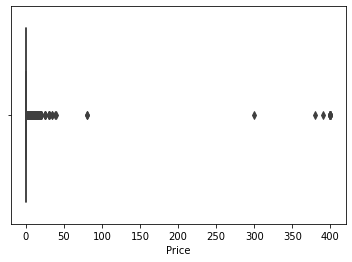

In [38]:
sns.boxplot(inp0.Price)
plt.show()

- Box plot for Reviews

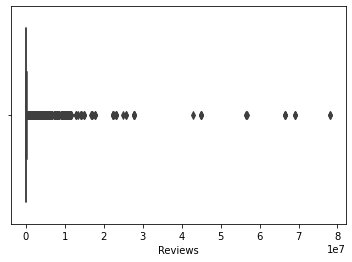

In [39]:
sns.boxplot(inp0.Reviews)
plt.show()

- Histogram for Rating

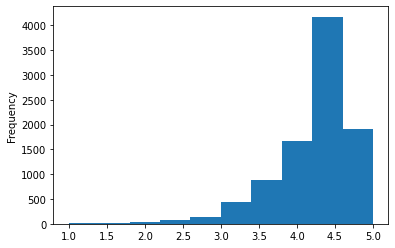

In [40]:
# .plot.hist() is used for histogram.
inp0.Rating.plot.hist()
plt.show()
#Insight of the histogram: 1- the histogram shows that most frequent vlaues of rating falls between around 4.2 to 4.6 which are 
#( betweeen 1660 and 4172 of Y)
# 2- And rating is representing negatively skewed data. 


(array([  17.,   18.,   41.,   74.,  137.,  445.,  879., 1660., 4172.,
        1910.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

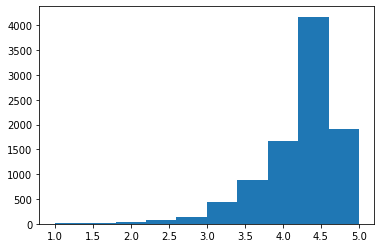

In [41]:
# to confirm where exatly the most refquent values are we write the code below. or without the code below we can see where 
# the most frequent values are.
plt.hist(inp0.Rating)




- Histogram of Size

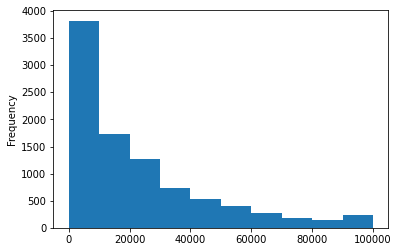

In [42]:
inp0['Size'].plot.hist()
plt.show()

(array([3823., 1738., 1265.,  742.,  536.,  406.,  279.,  190.,  144.,
         230.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <BarContainer object of 10 artists>)

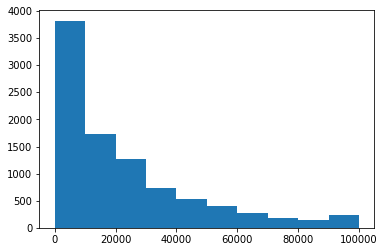

In [43]:
plt.hist(inp0.Size)

6. Outlier treatment: 

1- Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

1.Check out the records with very high price

2.Is 200 indeed a high price?

3.Drop these as most seem to be junk apps

Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

1- Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

1.Check out the records with very high price

2.Is 200 indeed a high price?

3.Drop these as most seem to be junk apps


Here we can not find the outlier by z score we need to remove them manually.

In [44]:
# sns.pairplot(data=inp0)

#### Something seems fishy with the price column

In [45]:
# 1.Check out the records with very high price 2.Is 200 indeed a high price? we do it with some filters: 
# let's find out where the price is greater than 200
inp0[inp0.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [46]:
# let's get the length of it.

len(inp0[inp0.Price > 200])
# they are 15.

15

In [47]:
#Let's see the prices that are less than 200. As data says we are not looking for those data greater than 200.
# with .copy() and seting new dataframe as inp0 we are droping data greater than 200. [ data freater than 200 is our outlier]
inp0 = inp0[inp0.Price <= 200].copy()

inp0.shape
# again number of our data reduced to 9338.

(9338, 13)

#### 6/2 - Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

Dropping records having more than 2 Million reviews

In [48]:
inp0

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,3600.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [49]:
# here teacher is not useig .copy() function.
# so we elimited outlier which here are reviews greater than 2000000
inp0 = inp0[inp0.Reviews <= 2000000]
inp0.shape

(8885, 13)

#6/3Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

1.Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
2.Decide a threshold as cutoff for outlier and drop records having values more than that


#### Dropping very high Installs values

In [ ]:
inp0.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])
 
#if your number of install are up to 99.7, everything is fine. because that approximately 
#your , that is your zscore equal to three, your third standard deviation.we need to look for 1% of data
#that makes some issues

Looks like there are just 1% apps having more than 100M installs. These apps might be genuine, but will definitely skew our analysis.  
We need to drop these.


In [ ]:
inp0[inp0.Installs >= 1000000000]

In [ ]:
len(inp0[inp0.Installs >= 1000000000])

In [ ]:
inp0 = inp0[inp0.Installs < 1000000000].copy()
inp0.shape

#### 7. Bi-Variate Analysis
( it is related to your plots and all)

"""
Bivariat analysis is about scater plot and box plot. This is a new type of plot which was nowhere mentoned. Basically you need to 
do two plots in one. One you should be able to have a box plot, you should also have the scatter plot. / [same name for scatter plot/joint plot]

"""



1.	Make scatter plot/joinplot for Rating vs Price

In [ ]:
sns.jointplot(inp0.Price, inp0.Rating)
# here is the joint plot output
# in right side [ short horizental blue lines ] we have distributin our histogram plot for rating. and on the other side [ the long blue rectangel out
#beyond the line] histogram for price, and this [ dots]
# is the scatter plot. Joint plot is combination of histograma / distribution plot  and scatter plot / relation plot
# you can change this rectangular blue above the line as box plot.

#Insight: between rating distribution/histogram plot and price distribution /histogram plot no pattern is represented.


2.	Make scatter plot/joinplot for Rating vs Size of app

In [ ]:
sns.jointplot(inp0.Size, inp0.Rating)

3.	Make scatter plot/joinplot for Rating vs Reviews

In [ ]:
sns.jointplot(inp0.Reviews, inp0.Rating)

4.	Make boxplot for Rating vs Content Rating

In [ ]:
plt.figure(figsize=[8,6])
sns.boxplot(inp0['Content Rating'], inp0.Rating)
plt.show()

5. Make boxplot for Ratings vs. Category

In [ ]:
plt.figure(figsize=[18,6])
g = sns.boxplot(inp0.Category, inp0.Rating)
plt.xticks(rotation=90)
plt.show()

#### 8. Data Pre-processing

We have a lot of categorcial and numerical data. 

Making a copy of the dataset

Question
1.Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.


In [86]:
# we are creating a new data frame. it is our original data that we prepare after so many changes
inp1 = inp0.copy()

In [ ]:
#when you have a lorge data you need to reduce the number by using log . log retunn your data to a smaller number.
# in our dataset values for Reviews and Installs are numbers, like 100000, or 10000000. By using np.log we reduce the size of these 
#large number to the range of our rest data. Range of values in our dataset is 4, 6, 8, now using log we reduce 
#1000000, 20000000, values to samller numner like 4, 5, 8 and so. If you look at the data you will find out what the range of our data is.



In [87]:
inp0.Installs.value_counts()
# (my understanding) count is counting number of each values  mentioned in the left column in the current output. For instance
#  there are 1576 times 1000000 in our dataset, there are 1238 times 10000000 in out dataset. Now using log in the cells below 
# reduces 1000000 to 13.815512 . So after log, useing count() shows that we have 1000000 changed to 13.815512. so we have 
#1576 times 13.815512


1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [89]:
# one of the methods to reduce the number of data we apply .np.loglp()
inp1.Installs = inp1.Installs.apply(np.log1p)

In [90]:
inp0.Installs.describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [91]:
# to see the reduced number of Installs
inp1.Installs.value_counts()
# we did this till our data be similar range. 


13.815512    1576
16.118096    1252
11.512935    1150
9.210440     1009
15.424949     752
6.908755      712
13.122365     537
10.819798     466
8.517393      431
18.420681     409
4.615121      309
17.727534     289
6.216606      201
20.030119      72
2.397895       69
20.723266      58
3.931826       56
1.791759        9
0.693147        3
Name: Installs, dtype: int64

In [94]:
inp0.Reviews.value_counts()

2         83
3         78
5         74
4         74
1         67
          ..
666521     1
342912     1
4272       1
5517       1
398307     1
Name: Reviews, Length: 5990, dtype: int64

In [120]:
inp1.Reviews = inp1.Reviews.apply(np.log1p)


In [121]:
inp1.Reviews

0        1.804211
1        2.063723
2        2.516043
3        2.586364
4        2.063723
           ...   
10834    1.124748
10836    1.539779
10837    0.959135
10839    1.748318
10840    2.631528
Name: Reviews, Length: 9360, dtype: float64

In [93]:
inp0.Reviews.value_counts()

2         83
3         78
5         74
4         74
1         67
          ..
666521     1
342912     1
4272       1
5517       1
398307     1
Name: Reviews, Length: 5990, dtype: int64

For preprocessing:
    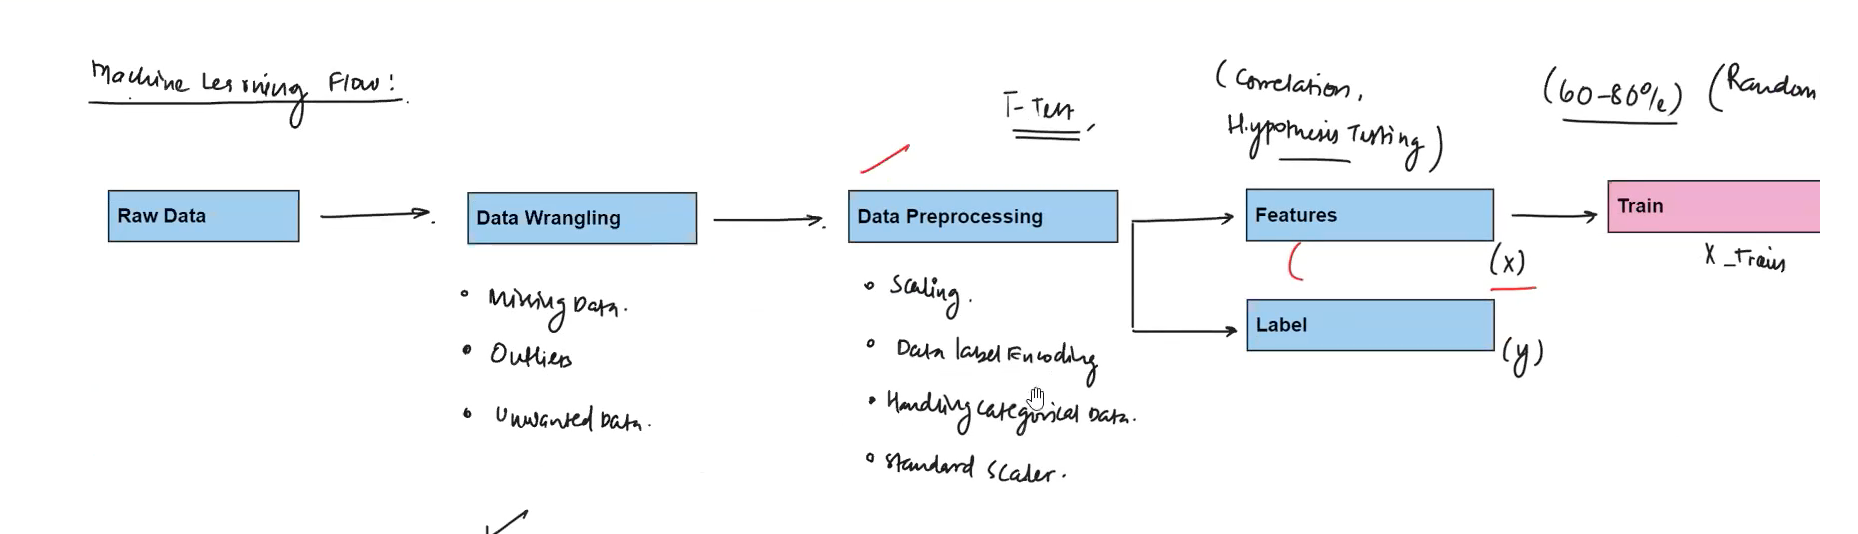
    
 Data lebel and coding;
 if your data has categorical set, then data  coding and label  will be used to 
   
if you have various higher  dementoinality values, larger numbers, like 10 to the power of 13, 10 to the power of 40 values, and so, on that you can  apply np.log1p, 

you can do scaling as well, where you can use min max scaler and  reduce the range to 1 to 10 or 0 to 1 as your choice or you can apply logerethmic term 

Getting dummy variables for Category, Genres, Content Rating

In [97]:
# first we look for our categorical / object data type.
inp1.dtypes


App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Question;
2.Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [98]:
# 2.Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.
#we drop those categorical columns that are not important. These are not importatn because Rating , our target is not 
#dependednt on App name, last upated and so on.
inp1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)



In [99]:
# these are our left categories. 
inp1.dtypes

Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

In [ ]:
# rest are importnat: How many is left now:
inp1.shape

In [101]:
# we apply lable and coding by pd.get_dummies drops categorical columns and  convert them  to A NEW COLUMNS.
pd.get_dummies(inp1, drop_first=True)
# many columns created now. multiple columns ceated this is how you apply label and coding, where you converting your categorical 
#data into a new columns.  
# my created columns differ with teacher's out put, or look at the untouched notebook. Because I executed this code after 
#running codes below.

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,12.281389,25000.0,17.727534,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,2.079442,2600.0,6.216606,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,4.5,3.663562,53000.0,8.517393,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,5.0,1.609438,3600.0,4.615121,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,4.5,4.744932,3600.0,6.908755,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
inp2 = pd.get_dummies(inp1, drop_first=True)

In [103]:
# pd.get_dummies is a function from pandas which will provide you with conversion of ategorical data into a 
#new columns which you can see here: for example look at this: Category_AUTO_AND_VEHICLES, category name is here 
# and it got the values. Values are column now, which will be filled with numerical values, either 1 or 0, like it is true or falsr.
# so your categorical columns will be a new column where their values are either 0 or 1. 

#for instance if an app belongs to a AUTO_AND_VEHICLES for that it will be 1, and if it belongs to some other categories it will 
# be zero. For other categories as well like:
#if a genres is education then, Genres_Tools;Education, will get 1 and if it is not education, it will get zero.
#Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
      # 'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       #'Genres_Video Players & Editors'
    
    
# so like that you can prepare your dataset.
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
#this is the line mentioned on the website:
#Convert categorical variable into dummy/indicator variables.

inp2.columns


Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

#### 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

#### Features & Target

In [108]:
from sklearn.model_selection import train_test_split


In [109]:
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 6)

In [110]:
#first number is your raining data and the second one is your test data.
df_train.shape, df_test.shape

((6552, 157), (2808, 157))

#### 10. Separate the dataframes into X_train, y_train, X_test, and y_test.
Screenshot of every output 
------

Final: one file for all the questiond and codes

one file for all the questions and screenshots / outputs.

Write up can be a bit of  probelam  statemtn, fields of data and solutions and libraries you used etc, short summary of everything.


"""
write up:
DESCRIPTION

Objective: Make a model to predict the app rating, with other information about the app provided.

Problem Statement:

Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

Domain: General

Analysis to be done: The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

Content: Dataset: Google Play Store data (“googleplaystore.csv”)

Fields in the data –

App: Application name

Category: Category to which the app belongs 

Rating: Overall user rating of the app

Reviews: Number of user reviews for the app

Size: Size of the app

Installs: Number of user downloads/installs for the app

Type: Paid or Free

Price: Price of the app

Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

Genres: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres.

Last Updated: Date when the app was last updated on Play Store

Current Ver: Current version of the app available on Play Store

Android Ver: Minimum required Android version



In [111]:
# in our classess we have written this line and the libe below together, but since exam wants us to do then seperately 
# I have weitten them in two differnt line: one for train and the second one for test.
y_train = df_train.pop("Rating")
X_train = df_train


In [112]:
y_test = df_test.pop("Rating")
X_test = df_test

In [113]:
X_train.shape, X_test.shape

((6552, 156), (2808, 156))

#### 11. Model building

In [114]:
from sklearn.linear_model import LinearRegression



In [115]:
lr = LinearRegression()

In [116]:
lr.fit(X_train, y_train)

LinearRegression()

#### 12. Make predictions on test set and report R2.

In [129]:
from sklearn.metrics import r2_score


In [119]:
y_test_pred= lr.predict(X_test)

r2_score(y_test, y_test_pred)


0.1445959242207956